In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder 

In [2]:
data = pd.read_csv('titanic.csv')

data.head(5)

,PassengerId,Name,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Name         891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [5]:
data_output = data.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
data_output

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0
...,...,...,...,...,...
886,2,male,27.0,13.0000,0
887,1,female,19.0,30.0000,1
888,3,female,NaN,23.4500,0
889,1,male,26.0,30.0000,1


In [6]:
data_output['Sex'] = LabelEncoder().fit_transform(data['Sex'])
data_output['Sex']

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 891, dtype: int32

In [7]:
data_output['Age'].fillna(data_output['Age'].median(), inplace=True)

X = data_output.drop('Survived', axis=1)
y = data_output['Survived']

print(X)
print(y)

     Pclass  Sex   Age     Fare
0         3    1  22.0   7.2500
1         1    0  38.0  71.2833
2         3    0  26.0   7.9250
3         1    0  35.0  53.1000
4         3    1  35.0   8.0500
..      ...  ...   ...      ...
886       2    1  27.0  13.0000
887       1    0  19.0  30.0000
888       3    0  28.0  23.4500
889       1    1  26.0  30.0000
890       3    1  32.0   7.7500

[891 rows x 4 columns]
0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


C:\Users\crist\AppData\Local\Temp\ipykernel_25172\2051713629.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_output['Age'].fillna(data_output['Age'].median(), inplace=True)


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
model = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=None,
    min_samples_split=2, min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, max_features=None,
    random_state=42, max_leaf_nodes=None,
    min_impurity_decrease=0.0, class_weight=None)

model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [11]:
accuracy = model.score(X_test, y_test)
print(f'{accuracy:.2f}')


0.75


In [12]:
# Importa la biblioteca numpy para operaciones numéricas.
import numpy as np

# Importa funciones para realizar validación cruzada y dividir datos.
from sklearn.model_selection import cross_val_score, KFold

# Configura un objeto de validación cruzada con 10 particiones (folds) y mezcla aleatoria.
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Calcula las puntuaciones de validación cruzada para el modelo usando los datos de entrenamiento.
results = cross_val_score(model, X_train, y_train, cv=cv)

# Calcula el promedio de las puntuaciones obtenidas en la validación cruzada.
fin_result = np.mean(results)

# Itera sobre las puntuaciones y las imprime con el índice de la iteración.
for i, score in enumerate(results):
    suffix = "th" if 10 <= i % 100 <= 20 else ("st" if i % 10 == 1 else ("nd" if i % 10 == 2 else ("rd" if i % 10 == 3 else "th")))
    print(f'{i}{suffix} puntuación de validación cruzada : {score:.1f}')

# Imprime el promedio final de las puntuaciones de validación cruzada.
print(f'Puntuación final de la validación cruzada: {fin_result:.2f}')

0th puntuación de validación cruzada : 0.8
1st puntuación de validación cruzada : 0.8
2nd puntuación de validación cruzada : 0.8
3rd puntuación de validación cruzada : 0.7
4th puntuación de validación cruzada : 0.7
5th puntuación de validación cruzada : 0.8
6th puntuación de validación cruzada : 0.8
7th puntuación de validación cruzada : 0.8
8th puntuación de validación cruzada : 0.8
9th puntuación de validación cruzada : 0.8
Puntuación final de la validación cruzada: 0.78


In [13]:
# Importa StratifiedKFold para asegurar que cada fold tenga la misma proporción de clases.
from sklearn.model_selection import StratifiedKFold

# Configura StratifiedKFold con 10 particiones y mezcla aleatoria.
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Calcula las puntuaciones de validación cruzada estratificada.
results = cross_val_score(model, X_train, y_train, cv=cv)

# Calcula el promedio de las puntuaciones obtenidas.
fin_result = np.mean(results)

# Imprime las puntuaciones para cada fold y su índice.
for i, score in enumerate(results):
    suffix = "th" if 10 <= i % 100 <= 20 else ("st" if i % 10 == 1 else ("nd" if i % 10 == 2 else ("rd" if i % 10 == 3 else "th")))
    print(f'{i}{suffix} puntuación de validación cruzada : {score:.1f}')

# Imprime el promedio final de validación cruzada estratificada.
print(f'Puntuación final de validación cruzada estratificada : {fin_result}')

0th puntuación de validación cruzada : 0.8
1st puntuación de validación cruzada : 0.8
2nd puntuación de validación cruzada : 0.8
3rd puntuación de validación cruzada : 0.8
4th puntuación de validación cruzada : 0.8
5th puntuación de validación cruzada : 0.8
6th puntuación de validación cruzada : 0.8
7th puntuación de validación cruzada : 0.8
8th puntuación de validación cruzada : 0.8
9th puntuación de validación cruzada : 0.7
Puntuación final de validación cruzada estratificada : 0.7808294209702661


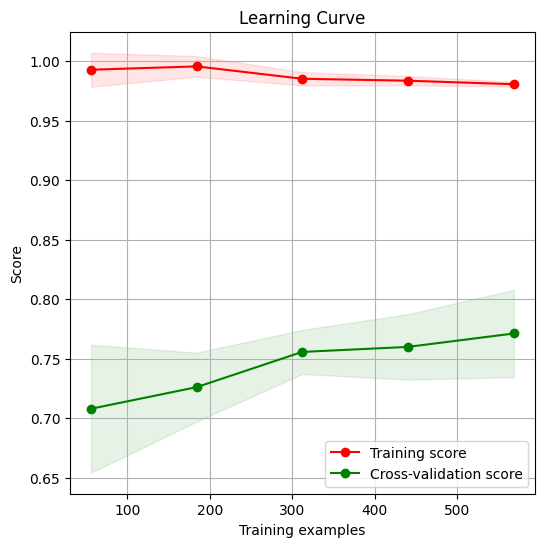

In [14]:
# Importa la librería scikit-plot para generar gráficos relacionados con el aprendizaje automático.
import scikitplot as skplt
# Importa matplotlib para la creación de gráficos.
import matplotlib.pyplot as plt
# Genera y muestra una curva de aprendizaje para el modelo.
skplt.estimators.plot_learning_curve(model, X_train, y_train, figsize=(6,6))
plt.show()

In [15]:
model = DecisionTreeClassifier(
    criterion='gini', splitter='best', max_depth=None,
    min_samples_split=2, min_samples_leaf=1, 
    min_weight_fraction_leaf=0.0, max_features=None,
    random_state=42, max_leaf_nodes=None,
    min_impurity_decrease=0.0, class_weight=None)

In [16]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()

parameters = {
    'max_depth': [4, 6, 8, 10, 12],
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
    'random_state': [7, 23, 42, 78, 142],
    'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
}

model2 = GridSearchCV(estimator = estimator, param_grid = parameters, cv = KFold(10), verbose = 1, n_jobs = -1, refit=True)

model2.fit(X_train, y_train)

Fitting 10 folds for each of 1600 candidates, totalling 16000 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, 12],
                         'min_impurity_decrease': [0.0, 0.05, 0.1, 0.2],
                         'min_weight_fraction_leaf': [0.0, 0.1, 0.2, 0.3],
                         'random_state': [7, 23, 42, 78, 142],
                         'splitter': ['best', 'random']},
             verbose=1)

In [17]:
model2.best_estimator_

DecisionTreeClassifier(max_depth=10, random_state=7)

In [18]:
model2.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_impurity_decrease': 0.0,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 7,
 'splitter': 'best'}

In [19]:
model2.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_impurity_decrease': 0.0,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 7,
 'splitter': 'best'}

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, model2.predict(X_test))

array([[91, 14],
       [27, 47]], dtype=int64)